# Data Collection and Analysis

#### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy as stats
import pandas as pd

Load data from file

In [17]:
def load_data(file_path):
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        data = np.array(data)
    
        
    # load data as dataframe
    columns = ['scores', 'apple', 'epsilon', 'game', 'steps']
    data = {'scores': data[0],
            'apple': data[1],
            'epsilon': data[2],
            'game': np.arange(len(data[0])),
            'steps' : np.cumsum(data[1])
            }
    dataframe = pd.DataFrame(data = data, columns = columns)

    return  dataframe 



,scores,apple,epsilon,game,steps
28791,580.0,1205.0,0.010000,28791,3889316.0
26964,570.0,1012.0,0.010000,26964,3254706.0
29433,570.0,981.0,0.010000,29433,4107588.0
30957,560.0,993.0,0.010000,30957,4641159.0
28613,560.0,989.0,0.010000,28613,3826454.0
...,...,...,...,...,...
4949,0.0,12.0,0.606062,4949,333848.0
4950,0.0,73.0,0.605996,4950,333921.0
4951,0.0,16.0,0.605981,4951,333937.0
21601,0.0,17.0,0.068260,21601,1789619.0


Antal spil

In [8]:
len(results)


31999

Plot score data

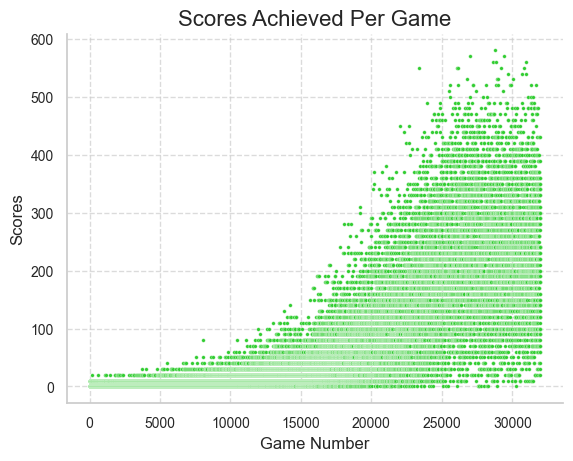

In [9]:
""" plt.scatter(games, scores)
plt.title('Scores Achieved Per Game')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.show() """



sns.set(style="whitegrid")
sns.scatterplot(x=results['game'], y=results['scores'], s=7, color="limegreen")
plt.title('Scores Achieved Per Game', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')
# plt.gca().invert_xaxis() # Invert axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()
plt.show()

In [30]:
results['scores']

580.0

## Line plot

In [36]:
def get_batch(dataframe, mean):


    # Defining array 
    score = np.array(dataframe['scores'])
    game = np.array(dataframe['steps'])

    # Batch size
    batch_size = 100

    # Calculate the number of batches and the size of the last batch
    num_batches = len(score) // batch_size
    last_batch_size = len(score) % batch_size

    # Creating batches
    batched_games = np.array(np.split(score[0: num_batches*batch_size], num_batches))

    if mean is False:
        # Calculating mean of each batch
        batched_rest_mean = np.array(np.max(score[num_batches*batch_size:]))
        batched_mean = np.max(batched_games, axis=1)
    else:
        batched_rest_mean = np.array(np.mean(score[num_batches*batch_size:]))
        batched_mean = np.mean(batched_games, axis=1)

    # Greating batched mean and batched game
    batched_score = np.concatenate((batched_mean, [batched_rest_mean]))
    batched_game = game[::batch_size]

    data = {'score' : batched_score,
            'game' : batched_game}
    
    batched_df = pd.DataFrame(data = data)

    return batched_df

batch_max = get_batch(results, False)
batch_mean = get_batch(results, True)

display(batch_max, batch_mean)



,score,game
0,10.0,47.0
1,20.0,7707.0
2,10.0,14412.0
3,10.0,20803.0
4,10.0,27789.0
...,...,...
315,490.0,4829835.0
316,520.0,4866463.0
317,480.0,4898536.0
318,480.0,4932072.0


,score,game
0,1.600000,47.0
1,1.300000,7707.0
2,0.900000,14412.0
3,1.300000,20803.0
4,1.000000,27789.0
...,...,...
315,232.400000,4829835.0
316,217.000000,4866463.0
317,221.800000,4898536.0
318,241.400000,4932072.0


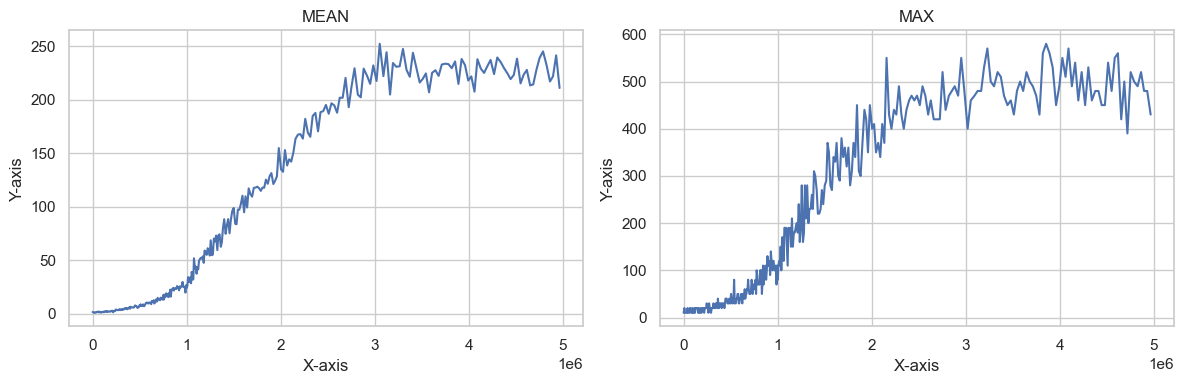

In [37]:
import matplotlib.pyplot as plt

# Create a figure with a 1x2 grid layout (1 row, 2 columns)
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

# Plot the first subplot (left)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the 1st subplot
plt.plot(batch_mean['game'], batch_mean['score'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MEAN')

# Plot the second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the 2nd subplot
plt.plot(batch_max['game'], batch_max['score'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MAX')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Plot Running Mean Score

In [12]:
cumulative_mean_scores = data[1]

"""
plt.scatter(games, scores, label='Individual Game Scores per 10th game')
plt.plot(games, cumulative_mean_scores, label='Cumulative Mean Scores', color='red')
plt.title('Game Scores and Cumulative Mean Scores')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()"""

sns.set(style="whitegrid")
sns.scatterplot(x=games, y=scores, s=7, label='Individual Game Scores per 10th game', color='limegreen')
sns.lineplot(x=games, y=cumulative_mean_scores, label='Cumulative Mean Scores', color='tomato')

plt.title('Game Scores and Cumulative Mean Scores', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()

KeyError: 1

Plot 95% Confidence Intervals

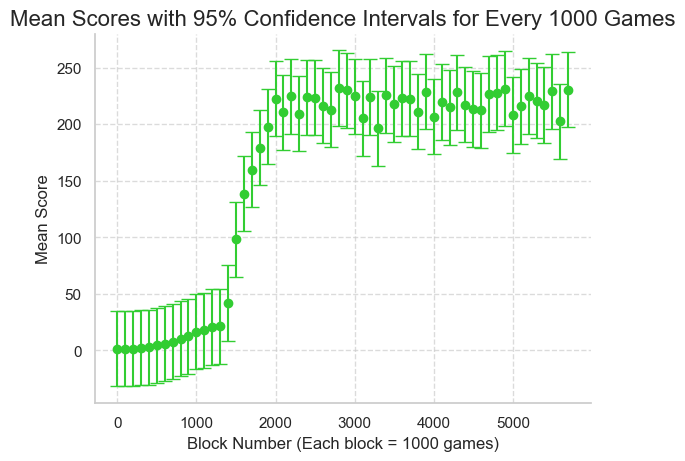

In [ ]:
block_size = 100 # We pulled data per 10 games run.
blocks = list(range(0, len(scores), block_size))
mean_scores = []
confidence_intervals = []

for i in range(0, len(scores), block_size):
    block = scores[i:i + block_size]
    if len(block) == 0:
        continue

    mean = np.mean(block)
    std_dev = np.std(block)

    ci = 1.96 * (std_dev / math.sqrt(len(block)))
    mean_scores.append(mean)
    confidence_intervals.append(ci)

"""
blocks = list(range(len(mean_scores)))
plt.errorbar(blocks, mean_scores, yerr=ci, fmt='o', capsize=5, label='Mean with 95% Confidence Intervals')
plt.title('Mean Scores with 95% Confidence Intervals for Every 1000 Games')
plt.xlabel('Block Number (Each block = 1000 games)')
plt.ylabel('Mean Score')
plt.grid(True)
plt.legend()
plt.show()"""

sns.set(style="whitegrid")

plt.errorbar(blocks, mean_scores, yerr=ci, fmt='o', capsize=5, label='Mean with 95% Confidence Intervals', color='limegreen')

plt.title('Mean Scores with 95% Confidence Intervals for Every 1000 Games', fontsize=16)
plt.xlabel('Block Number (Each block = 1000 games)')
plt.ylabel('Mean Score')

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()

#### Data analysis on Models running on pre-trained Data.

95% Confidence Interval

In [ ]:
new_data_file = ''

with open(new_data_file, 'rb') as file:
    scores = pickle.load(file)

scores_array = np.array(scores)

mean = np.mean(scores_array)
sem = stats.sem(scores_array)

confidence_level = 0.95

conf_int = stats.t.interval(confidence_level, len(scores_array)-1, loc=mean, scale=sem)

print(f"Mean: {mean}")
print(f"Confidence Interval: {conf_int}")

FileNotFoundError: [Errno 2] No such file or directory: ''

Mean steps between apples